In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras import optimizers
from tensorflow.keras import regularizers

from tensorflow.keras.metrics import mean_absolute_error

from tensorflow.keras.utils import to_categorical 


In [3]:
# Loading a Keras dataset:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# Shape of the dataset: 
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

# Distribution of the houses' prices in the training set
sns.histplot(y_train)

NameError: name 'boston_housing' is not defined

**Different Activation Functions:**

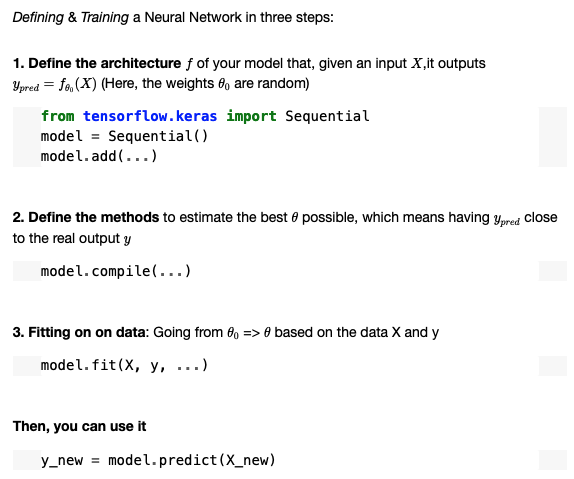

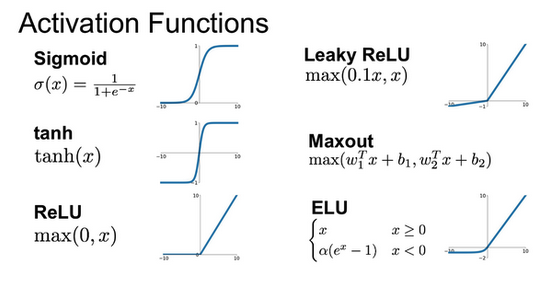

In [40]:
# Data manipulation
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# 1. Dense Layer Neural Network

This is the most basic structure for neural networks, consisting of layers of 'Dense' neurons.

- - - - - 

Defining & Training a Neural Network in three steps:

1. Define the architecture of your model that, given an input X,it outputs y_pred = f(X)

    from tensorflow.keras import Sequential
    model = Sequential()
    model.add(...)

2. Define the methods to estimate the best θ possible, which means having y_pred close to the real output y

    model.compile(...)

3. Fitting on on data: Going from θ0 => θ, based on the data X and y

    model.fit(X, y, ...)

Then, you can use it

    y_new = model.predict(X_new)



## 1.1 Overview

In [4]:
import tensorflow as tf
import numpy as np

X = np.random.random((100,10))
y = np.random.random((100,))

### 1.1.1 ARCHITECTURE

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#### 1. ARCHITECTURE
model = Sequential()
model.add(Dense(50, activation='relu', input_dim=10)) # eq. input_shape=(10,)
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='relu'))

#### LAST LAYER is dictated by the task

#### REGRESSION TASKS REQUIRE LINEAR ACTIVATION FUNCTIONS

### size 1 (predict one value): 
model.add(Dense(1, activation='linear'))

# OR

### size 13 (y_pred.shape=(13,)) 
model.add(Dense(13, activation='linear'))

#### CLASSIFICATION TASKS REQUIRES SOFTMAX/SIGMOID

### 2 classes (binary)
model.add(Dense(1, activation='sigmoid'))

# OR

### 8 classes (y_pred.shape=(8,))
model.add(Dense(8, activation='softmax'))

2022-10-28 23:58:09.225975: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Softmax turns numbers into probabilities that sums to 1:

In [6]:
# Small exercice: how many parameters in this simple regression task: 

model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                50        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


#### 1.1.1.1 Create An Initialize Model Function

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

def initialize_model():
    
    model = models.Sequential()
    
    model.add(layers.Dense(10, activation='relu', input_dim=13)) # 1st hidden layer with 5 neurons
    
    model.add(layers.Dropout(rate=0.1))  # The rate is the percentage of neurons that are "killed"
    model.add(layers.Dense(7, activation='relu')) # 1st hidden layer with 5 neurons
    model.add(layers.Dropout(rate=0.1))  # The rate is the percentage of neurons that are "killed"
    
    model.add(layers.Dense(1, activation='linear')) # Output layer that outputs a probability of belonging
                                                 # to the class of "success"
    
    return model   

**2. COMPILATION**

In [ ]:

#### 2. COMPILATION

from tensorflow.keras import optimizers
adam_opt = optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)

# Classification with 2 classes
model.compile(loss='binary_crossentropy', 
              optimizer=adam_opt,
              metrics=['accuracy'])

# Classification with more classes
model.compile(loss='categorical_crossentropy', 
              optimizer=adam_opt,
              metrics=['accuracy'])

# Regression
model.compile(loss='mse', 
              optimizer=adam_opt,
              metrics=['mae'])


**3.FIT**

In [ ]:
#### 3. FIT

from tensorflow.keras import callbacks

es = callbacks.EarlyStopping(patience=30, restore_best_weights=True)

history = model.fit(X, y,
          batch_size=16, # When batch size is too small --> no generalization. Typically go with a multiple of 2, so 16, 32 or 64
          epochs=100,    # When batch size is too large --> slow computations
          validation_split=0.3,  # !!!ONLY CHOOSE ONE!!! Validate by splitting a portion of the fit data to use as a test 
          validation_data = (X_test_s, y_test),  # !!!ONLY CHOOSE ONE!!! Validate by using a separete data you specify
          callbacks=[es],
          verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


2022-05-24 23:08:37.801561: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 1.2 Training: Loss & Optimization

model.compile(...)   
model.fit(...)

### 1.2.1 Compiling

In [ ]:
model.compile(loss='mse',
              optimizer='adam',
              metrics = ['mse',     # Mean Squared Error
                         'mae',     # Mean Absolute Error
                         'mape']     # Mean Absolute Percentage Error
                         )

- The loss is the way you compare ytrue to ypred
- The optimizer is the way you update θ over the iterations to get closer to ytrue (called "solver" in sklearn)

**NEED TO ADD A BUNCH OF STUFF FROM LEWAGON CHALLENGES AND LECTURE ON THIS**

### 1.2.3 Cross Validation - KFold

🧑🏻‍💻 Write a loop using the K-Fold function from Scikit-Learn.

KFold is a usefull function that creates a series of folds in the data to allow for cross validation.

In [45]:
# BLOB DATASET
from sklearn.datasets import make_blobs

In [46]:
X, y = make_blobs(
    n_samples=2000, 
    centers=8, 
    n_features=10,
    cluster_std= 7,
    random_state=1)

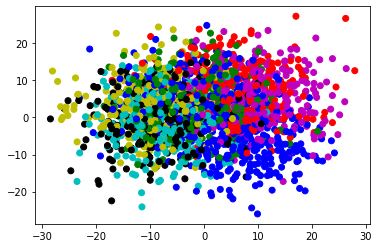

In [47]:
colormap = np.array(['b', 'g', 'r', 'c', 'm', 'y', 'k','b'])
plt.scatter(X[:,0],X[:,1],c = colormap[y])

In [48]:
y_cat = to_categorical(y)

In [49]:
def initialize_model():
    
    model = models.Sequential()
    
    model.add(layers.Dense(25, activation='relu', input_dim=10)) # 1st hidden layer with 5 neurons
    model.add(layers.Dense(10, activation='relu')) # 1st hidden layer with 5 neurons
    
    model.add(layers.Dense(8, activation='softmax')) # Output layer that outputs a probability of belonging
                                                 # to the class of "success"
    
    model.compile(loss='categorical_crossentropy', # different from binary_crossentropy because we have multiple classes
                  optimizer='adam', 
                  metrics=['accuracy']) 

    return model     
    

Starting Split 0


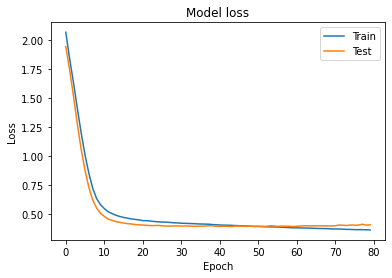

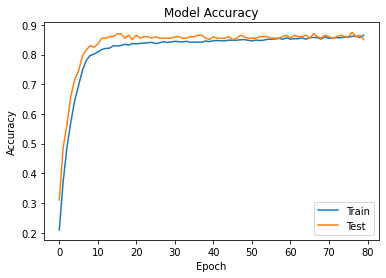

Finished Split 0
7/7 [==============================] - 0s 831us/step - loss: 0.3942 - accuracy: 0.8650
Starting Split 1


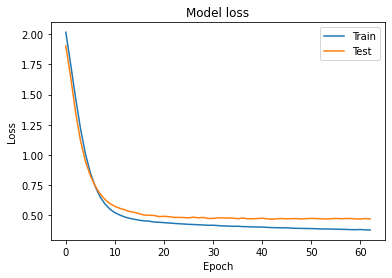

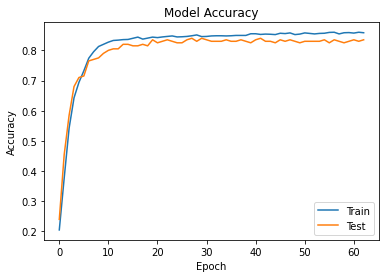

Finished Split 1
7/7 [==============================] - 0s 924us/step - loss: 0.4668 - accuracy: 0.8300
Starting Split 2


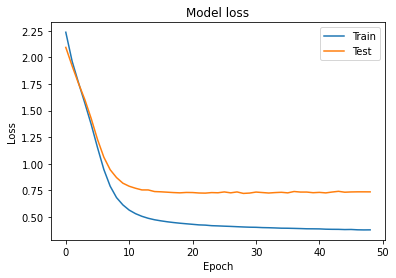

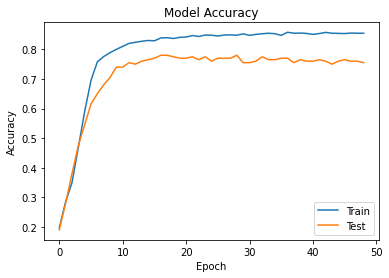

Finished Split 2
7/7 [==============================] - 0s 947us/step - loss: 0.7218 - accuracy: 0.7800
Starting Split 3


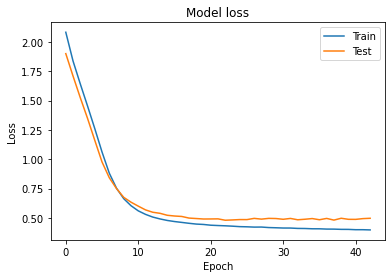

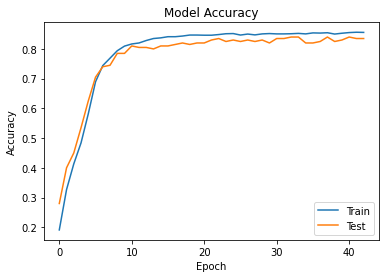

Finished Split 3
7/7 [==============================] - 0s 769us/step - loss: 0.4804 - accuracy: 0.8350
Starting Split 4


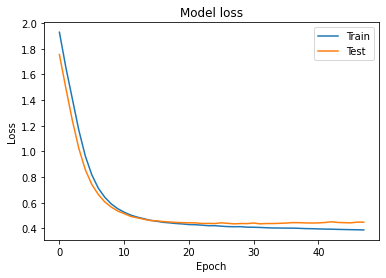

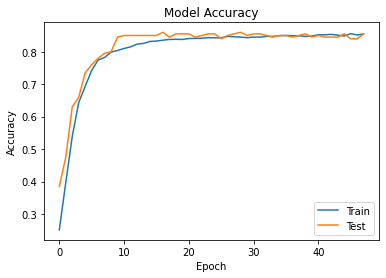

Finished Split 4
7/7 [==============================] - 0s 1ms/step - loss: 0.4360 - accuracy: 0.8550
Starting Split 5


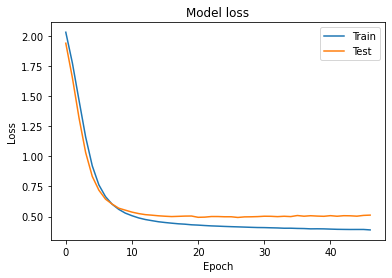

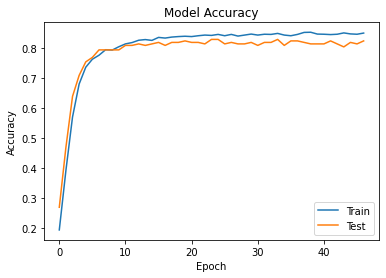

Finished Split 5
7/7 [==============================] - 0s 1ms/step - loss: 0.4923 - accuracy: 0.8200
Starting Split 6


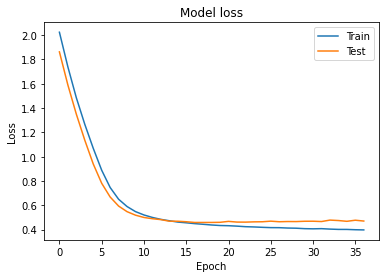

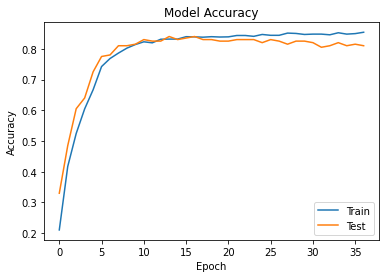

Finished Split 6
7/7 [==============================] - 0s 956us/step - loss: 0.4590 - accuracy: 0.8400
Starting Split 7


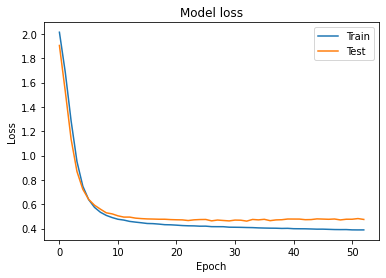

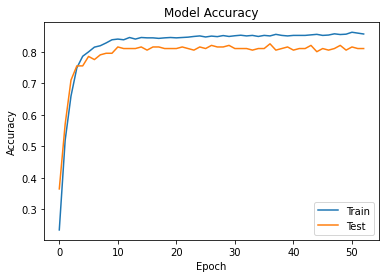

Finished Split 7
7/7 [==============================] - 0s 1ms/step - loss: 0.4619 - accuracy: 0.8100
Starting Split 8


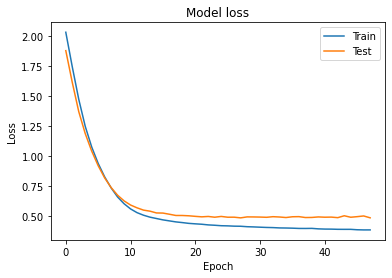

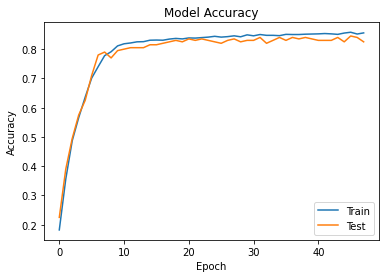

Finished Split 8
7/7 [==============================] - 0s 877us/step - loss: 0.4837 - accuracy: 0.8350
Starting Split 9


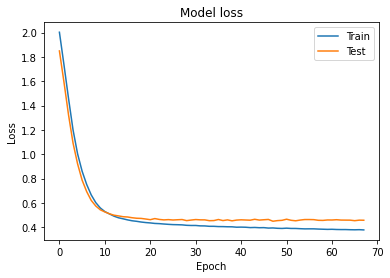

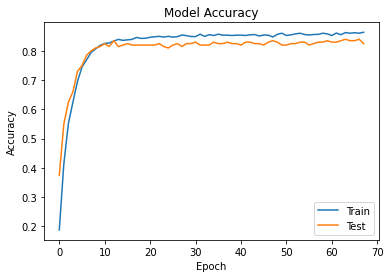

Finished Split 9
7/7 [==============================] - 0s 891us/step - loss: 0.4495 - accuracy: 0.8350


In [50]:
kf = KFold(n_splits=10)
kf.get_n_splits(X)



results = []

for train_index, test_index in kf.split(X):
    
    print(f'Starting Split {len(results)}')
    
    # Split the data into train and test
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_cat[train_index,:], y_cat[test_index,:]
    
    # Scaling your data
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_s = scaler.transform(X_train)
    X_test_s = scaler.transform(X_test)
    
    # Initialize the model
    
    model = initialize_model()
    
    # Fit the model on the train data
    
    es = EarlyStopping(patience=20, restore_best_weights=True)

    history = model.fit(X_train_s, 
                    y_train, 
                    validation_data = (X_test_s, y_test), 
                    epochs = 1500, 
                    batch_size = 32,
                    verbose = 0,
                    callbacks=[es])
    
    # Evaluate the model on the test data
    
    plot_loss_accuracy(history)
    print(f'Finished Split {len(results)}')
    results.append(model.evaluate(X_test_s, y_test)[1])

❓ **Question: Performance of the Cross Validated Network** ❓ 

Print the average accuracy of these 10 folds and the standard deviation of these 10 accuracy values.

In [51]:
print(np.array(results).mean())
print(np.array(results).std())

0.8304999887943267
0.022410942581161372


In [54]:
history.__dict__

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x182ec9310>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [2.0032477378845215,
   1.7357921600341797,
   1.4601651430130005,
   1.2000840902328491,
   1.0033984184265137,
   0.8602613210678101,
   0.7518299221992493,
   0.6658456921577454,
   0.6026517748832703,
   0.5585399866104126,
   0.5287562012672424,
   0.5099062919616699,
   0.4912417531013489,
   0.47789740562438965,
   0.4694841206073761,
   0.460550457239151,
   0.45319196581840515,
   0.44876018166542053,
   0.44286414980888367,
   0.4385986924171448,
   0.4355391561985016,
   0.4313092827796936,
   0.4296528995037079,
   0.4265133738517761,
   0.4238355755805969,
   0.4216960370540619,
   0.4208170175552368,
   0.41953244805336,
   0.41590753197669983,
   0.41451194882392883,
   0.41459187865257263,
   0.41136443614959717,
   0.4108736515045166,
   0.40773510932922363,
   0.40765511989593506,
   0.4054704010486603,

In [55]:
max(history.epoch)

67

In [56]:
history.params['epochs']

1500

### 1.2.3 Batch Size & Epochs

CPU times: user 51.4 s, sys: 20.9 s, total: 1min 12s
Wall time: 35.8 s


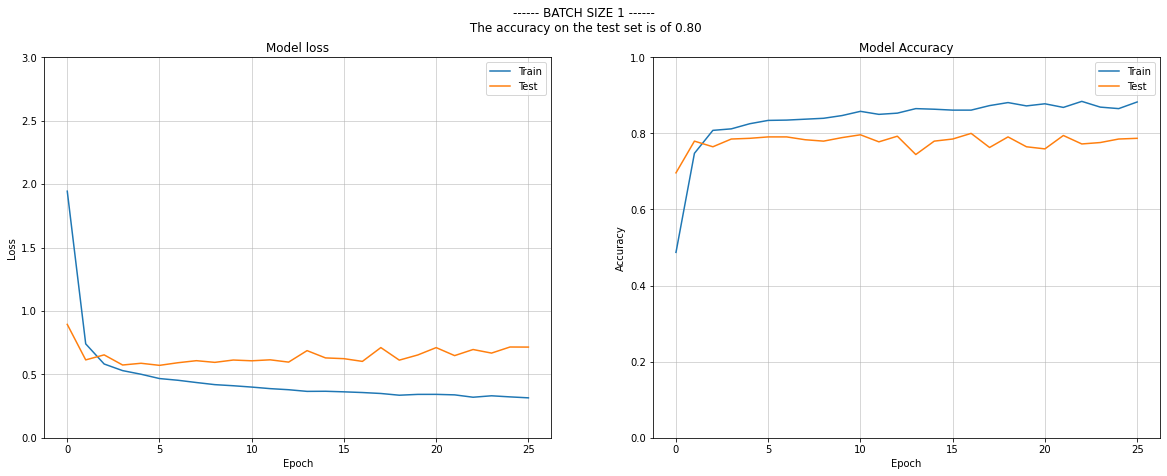

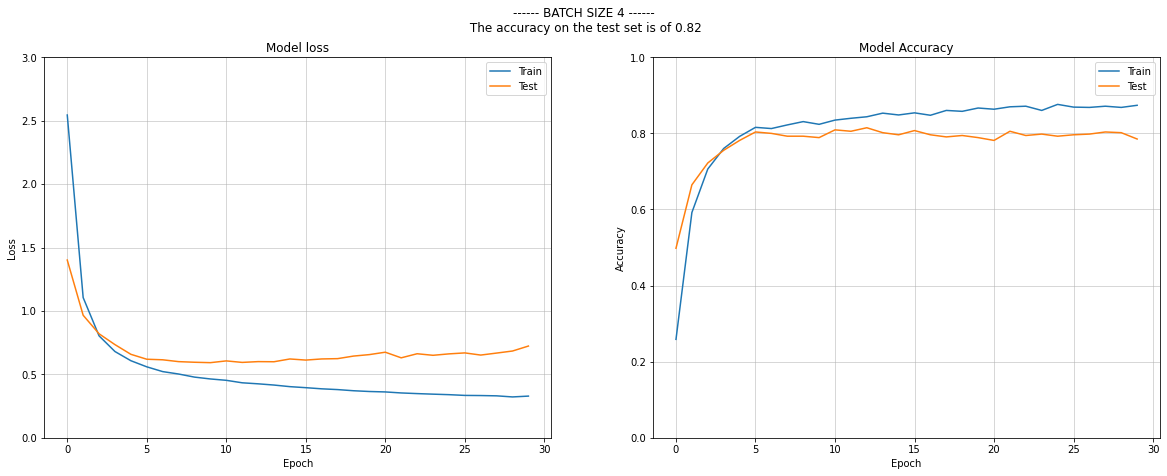

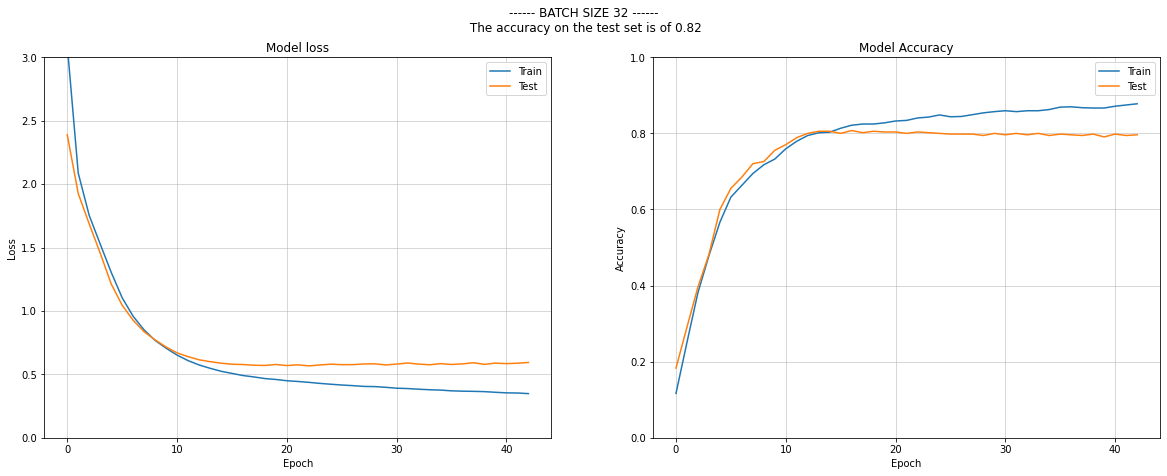

In [58]:
%%time
# RUN THIS CELL
es = EarlyStopping(patience=20, restore_best_weights=True)

for batch_size in [1, 4, 32]:
    
    model = initialize_model()

    history = model.fit(X_train, y_train,
                        validation_split = 0.3,
                        epochs = 500,
                        batch_size = batch_size, 
                        verbose = 0, 
                        callbacks = [es])

    results = model.evaluate(X_test, y_test, verbose=0)
    plot_loss_accuracy(history, title=f'------ BATCH SIZE {batch_size} ------\n The accuracy on the test set is of {results[1]:.2f}')

### 1.2.4 Regularization

❗️ Neural Networks with complex architectures can quickly lead to overfitting ("too many" layers and/or neurons...). ❗️

🔥 But as Dense Neural Networks are just activated linear regressions, the weights can be constrained using L1, L2 or L1-L2 penalties!

🚓 So, let's apply some L2 or L1 penalties to these neurons. As in Machine Learning, these penalties are called Regularizers.


    First, let's initialize a model that has too many parameters for the task such that it overfits the training data quickly. To that purpose, let's not use any Early Stopping criterion.

🎁 Let's not waste time re-coding something that you are now used to, just run the following cell and observe what is happening 👇


The accuracy on the test set is 0.75...
...whereas the accuracy on the training set is 0.90!


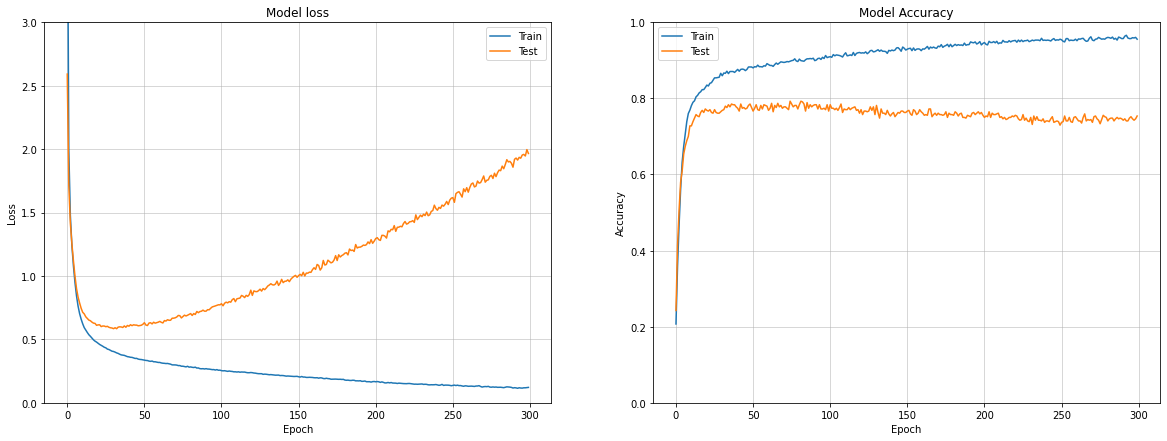

In [59]:
# RUN THIS CELL

# 1. Model Architecture
model = models.Sequential()
model.add(layers.Dense(25, activation='relu', input_dim=10))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

# 2. Model compilation
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 3. Training 
history = model.fit(X_train, y_train,
                    validation_split = 0.3,
                    epochs = 300,           # Notice that we are not using any Early Stopping Criterion
                    batch_size = 16, 
                    verbose=0)

# 4. Evaluation
results_train = model.evaluate(X_train, y_train, verbose = 0)
results_test = model.evaluate(X_test, y_test, verbose = 0)


# 5. Looking back at what happened during the training phase
print(f'The accuracy on the test set is {results_test[1]:.2f}...')
print(f'...whereas the accuracy on the training set is {results_train[1]:.2f}!')
plot_loss_accuracy(history)

#### 1.2.4.1 Regularizers

Change the previous code to integrate a L2 or L1 regularizer to your Dense Layers.

In [60]:
from tensorflow.keras import regularizers

The accuracy on the test set is 0.82...
...whereas the accuracy on the training set is 0.89!


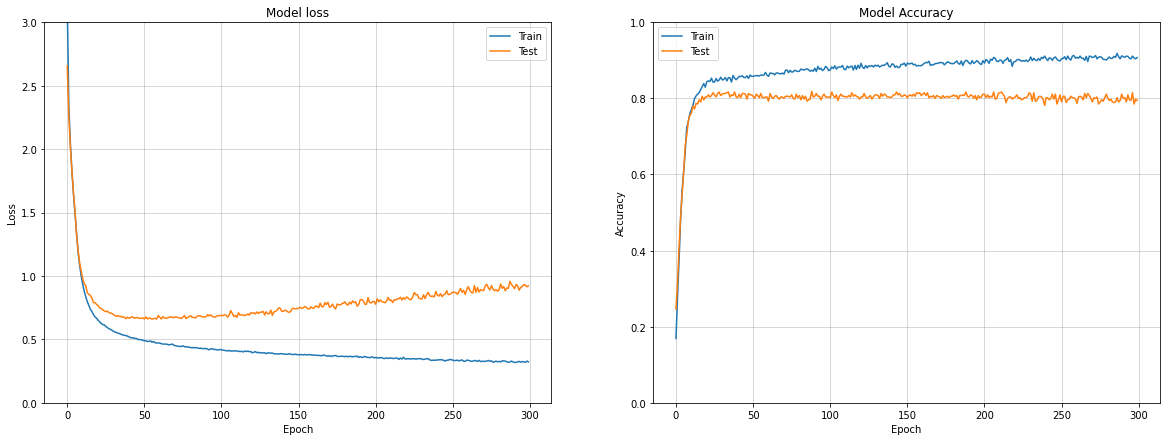

In [61]:
reg_l1 = regularizers.L1(0.01)
reg_l2 = regularizers.L2(0.01)
reg_l1_l2 = regularizers.l1_l2(l1=0.005, l2=0.0005)


# 1. Model Architecture
model = models.Sequential()
model.add(layers.Dense(25, activation='relu', input_dim=10))
model.add(layers.Dense(10, activation='relu', kernel_regularizer=reg_l1))  #<=== INCLUDING REGULARIZER!!! 
model.add(layers.Dense(8, activation='softmax'))

# 2. Model compilation
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 3. Training 
history = model.fit(X_train, y_train,
                    validation_split = 0.3,
                    epochs = 300,           # Notice that we are not using any Early Stopping Criterion
                    batch_size = 16, 
                    verbose=0)

# 4. Evaluation
results_train = model.evaluate(X_train, y_train, verbose = 0)
results_test = model.evaluate(X_test, y_test, verbose = 0)


# 5. Looking back at what happened during the training phase
print(f'The accuracy on the test set is {results_test[1]:.2f}...')
print(f'...whereas the accuracy on the training set is {results_train[1]:.2f}!')
plot_loss_accuracy(history)

#### 1.2.4.2 Dropout Layers

✂️ Dropout Layers ✂️

    ✅ They are super straightforward to code
    👩🏻‍🏫 But what is going on "under the hood" ? (You love this expression right? 😏)

Introduction to Dropout Layers

    Their role is to randomly cancel the output of some neurons during the training phase
    It prevents the network from getting too specific to the input data. With Dropout layers,
        No neuron can overspecialize in learning a pattern of the dataset because it's output sometimes canceled by the Dropout Layer
        Overall, a Dropout Layer forces the information of an input to be spread across multiple neurons instead of only one specific neuron


The accuracy on the test set is 0.82...
...whereas the accuracy on the training set is 0.87!


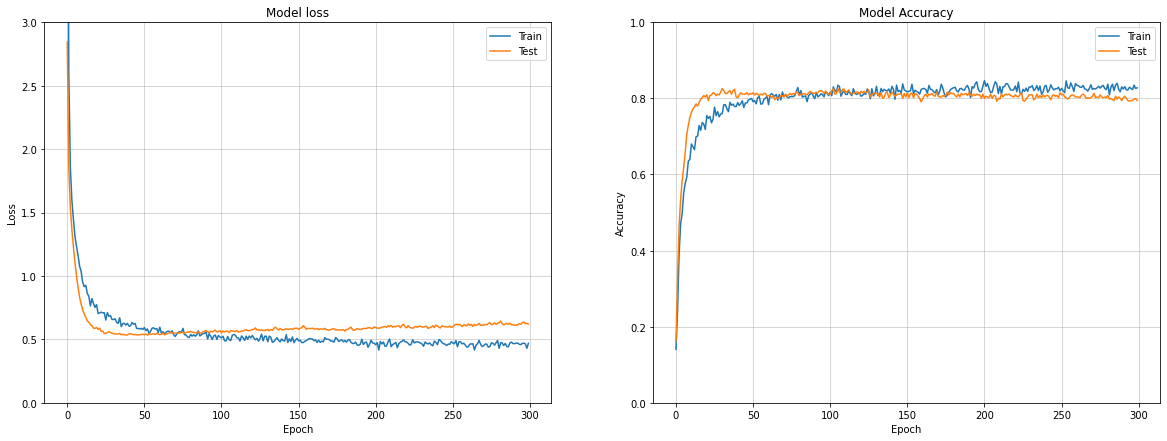

In [62]:
# 1. Model Architecture
model = models.Sequential()
model.add(layers.Dense(25, activation='relu', input_dim=10))
model.add(layers.Dropout(rate=0.1))  # The rate is the percentage of neurons that are "killed"
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(rate=0.1))  # The rate is the percentage of neurons that are "killed"
model.add(layers.Dense(8, activation='softmax'))

# 2. Model compilation
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 3. Training 
history = model.fit(X_train, y_train,
                    validation_split = 0.3,
                    epochs = 300,           # Notice that we are not using any Early Stopping Criterion
                    batch_size = 16, 
                    verbose=0)

# 4. Evaluation
results_train = model.evaluate(X_train, y_train, verbose = 0)
results_test = model.evaluate(X_test, y_test, verbose = 0)


# 5. Looking back at what happened during the training phase
print(f'The accuracy on the test set is {results_test[1]:.2f}...')
print(f'...whereas the accuracy on the training set is {results_train[1]:.2f}!')
plot_loss_accuracy(history)

Conclusions:

    ❗️ If you train a Neural Network too much (too many layers, too many neurons and/or too many epochs), it will overfit very quickly

    🥊 To prevent overfitting in Deep Learning, you can use Early Stopping, Regularization and Dropout Layers.

    ❗️ Be careful, if you use these techniques, you might end up on the other spectrum of the performance where you model would underfit the dataset!


## 1.3 Saving and loading a trained neural network

🤯 Imagine that you trained a complex Neural Network (many layers/neurons) on a huge dataset. The parameters of your Deep Learning Model (weights and biases) are now optimized and you would like to share these weights with a teammate who wants to predict a new datapoint. Would you give this person your notebook for her/him to run it entirely and then predict the new datapoint ? Hell no, we have a much better solution:

    💾 Save the weights of the optimised neural network
    🤝 Your friend/colleague/teammate/classmate can use them to predict a new datapoint



https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model

In [ ]:
from tensorflow.keras import models

models.save_model(model, 'my_model')

https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model

# 2. Convoluted Neural Networks

# 3. Recuring Neural Networks

# 7 Plotting

In [44]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

In [53]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # --- LOSS --- 
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Test'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- ACCURACY
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    ax[1].set_ylim((0,1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
    
    if title:
        fig.suptitle(title)

# 8 Data Sets

## 8.1 fetch_lfw_people


In [5]:
# Load data
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=200, resize=0.25)

# 766 images of 31 * 23 pixel black & white
print(faces.images.shape)

(766, 31, 23)


In [8]:
# 2 different target classes
np.unique(faces.target)

array([0, 1])

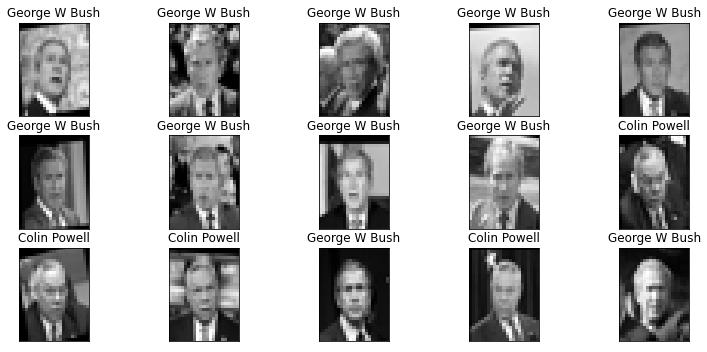

In [9]:
fig = plt.figure(figsize=(13,10))
for i in range(15):
    plt.subplot(5, 5, i + 1)
    plt.title(faces.target_names[faces.target[i]], size=12)
    plt.imshow(faces.images[i], cmap=plt.cm.gray)
    plt.xticks(()); plt.yticks(())

In [11]:
# Flatten our 766 images
X = faces.images.reshape(766, 31*23)
X.shape

(766, 713)

In [12]:
y = faces.target
y.shape

(766,)

In [25]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [26]:
# Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Model definition
model = Sequential()
model.add(layers.Dense(20, activation='relu', input_dim=713))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                14280     
                                                                 
 dense_9 (Dense)             (None, 10)                210       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 14,501
Trainable params: 14,501
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics = 'accuracy')

history = model.fit(X_train, 
                    y_train, 
                    batch_size=16, 
                    epochs=20)

Epoch 1/20
36/36 [==============================] - 0s 1ms/step - loss: 0.5704 - accuracy: 0.7003
Epoch 2/20
36/36 [==============================] - 0s 822us/step - loss: 0.2969 - accuracy: 0.8972
Epoch 3/20
36/36 [==============================] - 0s 832us/step - loss: 0.1798 - accuracy: 0.9599
Epoch 4/20
36/36 [==============================] - 0s 815us/step - loss: 0.1123 - accuracy: 0.9791
Epoch 5/20
36/36 [==============================] - 0s 932us/step - loss: 0.0717 - accuracy: 0.9948
Epoch 6/20
36/36 [==============================] - 0s 839us/step - loss: 0.0472 - accuracy: 0.9983
Epoch 7/20
36/36 [==============================] - 0s 817us/step - loss: 0.0343 - accuracy: 1.0000
Epoch 8/20
36/36 [==============================] - 0s 774us/step - loss: 0.0230 - accuracy: 1.0000
Epoch 9/20
36/36 [==============================] - 0s 749us/step - loss: 0.0162 - accuracy: 1.0000
Epoch 10/20
36/36 [==============================] - 0s 799us/step - loss: 0.0118 - accuracy: 1.0000
E

In [29]:
model.evaluate(scaler.transform(X_test), y_test)
# returns [loss, metrics]

6/6 [==============================] - 0s 1ms/step - loss: 0.2192 - accuracy: 0.9219


[0.2192295640707016, 0.921875]

## 8.2 Make Blobs